# Notebook to make Fig. 3

In [1]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import pylab
import pandas as pd
from scipy.stats import gaussian_kde

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style

from helper_functions import *

style.use('plotting.mplstyle')

### Data for true underlying populations

Load data

In [2]:
f_root = '/home/simona.miller/Xeff_injection_campaign/data/' ## TODO: update to have results from this folder?
pop1 = pd.read_json(f_root+'underlying_population1.json')
pop2 = pd.read_json(f_root+'underlying_population2.json')
pop3 = pd.read_json(f_root+'underlying_population3.json')

Make KDEs for spin parameters of underlying populations

In [3]:
# Set up grids to evaluate KDEs on
chi_grid = np.linspace(0,1,500)
cost_grid =  np.linspace(-1,1,500)
chieff_grid =  np.linspace(-1,1,500)
chip_grid =  np.linspace(0,1,500)

# Dict in which to store KDEs
kde_dict = {}

# Cycle through populations
for pop,lbl in zip([pop1, pop2, pop3], ['pop1', 'pop2', 'pop3']):
    
    # spin magnitude
    chi1 = np.sqrt(pop.s1x**2 + pop.s1y**2 + pop.s1z**2)
    chi2 = np.sqrt(pop.s2x**2 + pop.s2y**2 + pop.s2z**2)
    chi = np.concatenate((chi1,chi2))
    chi_kde = gaussian_kde(chi)(chi_grid) + gaussian_kde(2-chi)(chi_grid) + gaussian_kde(-chi)(chi_grid)
    
    # tilt angle
    cost1 = pop.s1z/chi1
    cost2 = pop.s2z/chi2
    cost = np.concatenate((cost1,cost2))
    cost_kde = gaussian_kde(cost)(cost_grid) + gaussian_kde(2-cost)(cost_grid) + gaussian_kde(-2-cost)(cost_grid)
    
    # chi effective
    q = pop.m2/pop.m1
    chieff = calculate_chiEff(chi1, chi2, cost1, cost2, q)
    chieff_kde = gaussian_kde(chieff)(chieff_grid) + gaussian_kde(2-chieff)(chieff_grid) + gaussian_kde(-chieff)(chieff_grid)
    
    # chi p
    sint1 = np.sin(np.arccos(cost1))
    sint2 = np.sin(np.arccos(cost2))
    chip = calculate_ChiP(chi1, chi2, sint1, sint2, q)
    chip_kde = gaussian_kde(chip)(chip_grid) + gaussian_kde(2-chip)(chip_grid) + gaussian_kde(-2-chip)(chip_grid)
    
    # put KDEs into dict
    kde_dict[lbl] = {
        'chi':chi_kde, 
        'cost':cost_kde, 
        'chieff':chieff_kde, 
        'chip':chip_kde
    }

### Make figure

In [4]:
labels_dict = {
    'pop1':r'$\mathrm{\textsc{HighSpinPrecessing}}$', 
    'pop2':r'$\mathrm{\textsc{MediumSpin}}$', 
    'pop3':r'$\mathrm{\textsc{LowSpinAligned}}$'
}

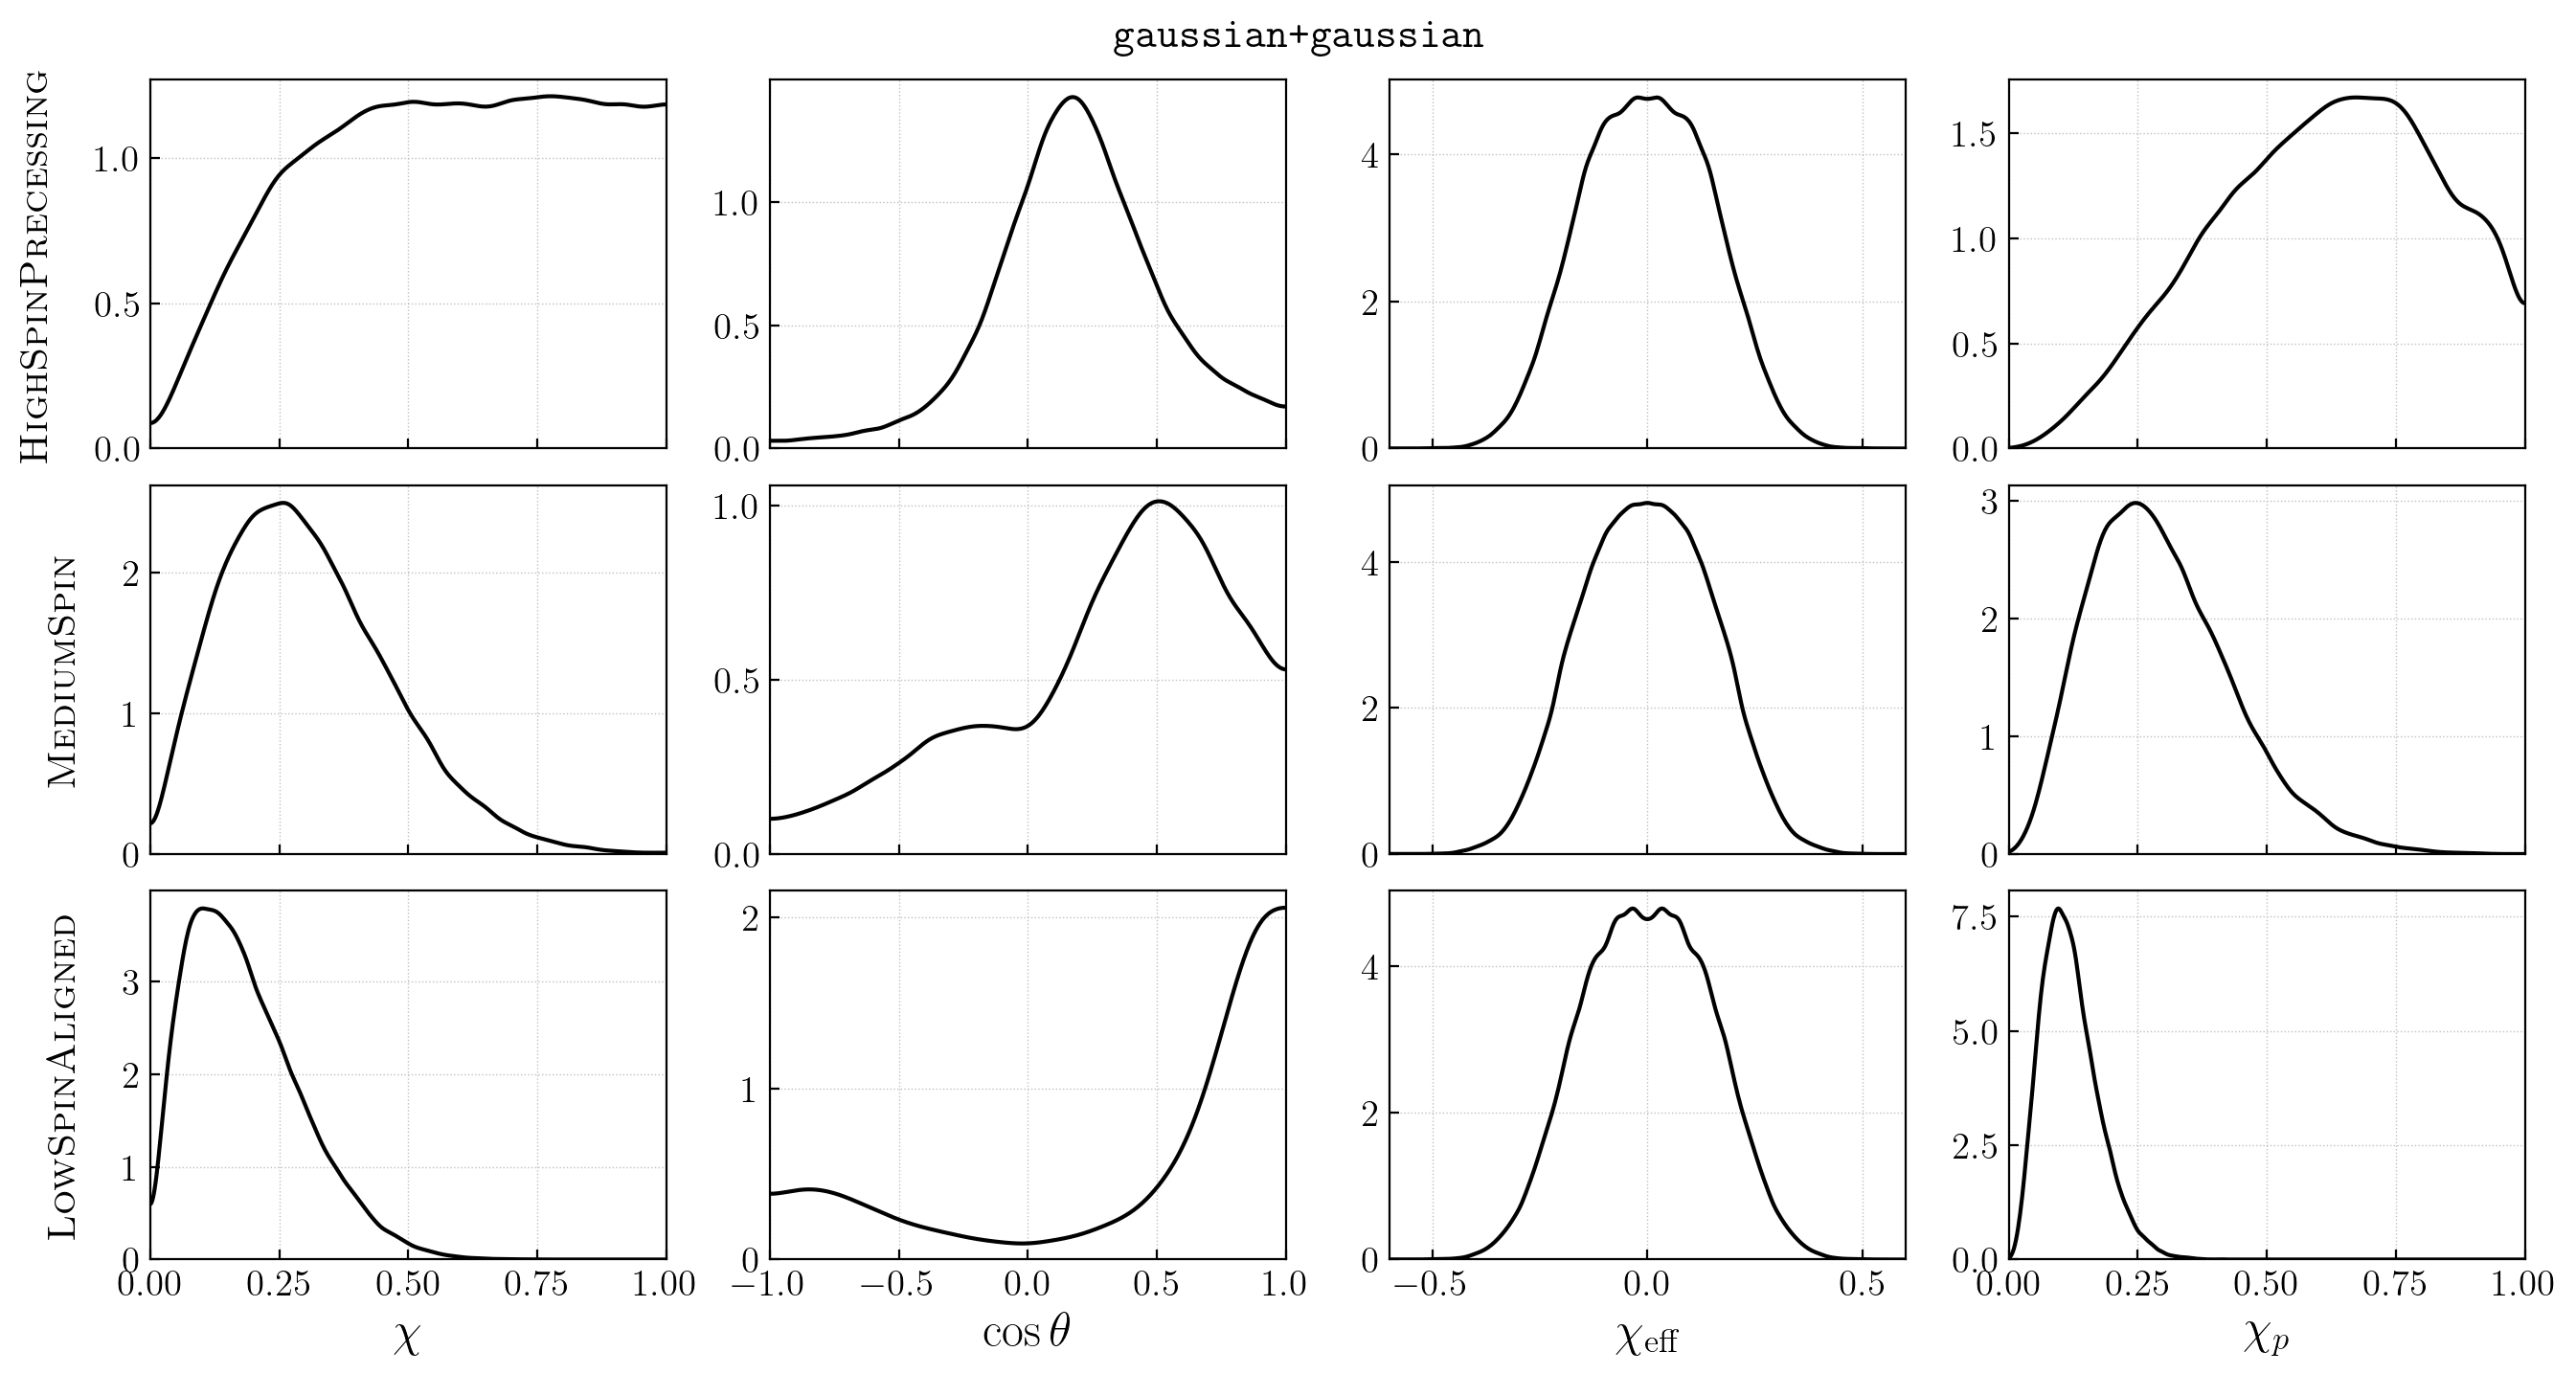

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,8))

for i,key in enumerate(kde_dict):
    
    # spin magnitude
    axes[i][0].plot(chi_grid, kde_dict[key]['chi'], color='k')
    axes[i][0].set_xlim(0,1)
    axes[i][0].set_ylim(0,)
    
    # tilt angle
    axes[i][1].plot(cost_grid, kde_dict[key]['cost'], color='k')
    axes[i][1].set_xlim(-1,1)
    axes[i][1].set_ylim(0,)
    
    # chi effective
    axes[i][2].plot(chieff_grid, kde_dict[key]['chieff'], color='k')
    axes[i][2].set_xlim(-0.6,0.6)
    axes[i][2].set_ylim(0,)
    
    # chi p
    axes[i][3].plot(chip_grid, kde_dict[key]['chip'], color='k')
    axes[i][3].set_xlim(0,1)
    axes[i][3].set_ylim(0,)
    
    # set label
    axes[i][0].set_ylabel(labels_dict[key], fontsize=15, labelpad=15)
    
    if i!=2: 
        for ax in axes[i]: 
            ax.set_xticklabels([])
    
axes[2][0].set_xlabel(r'$\chi$')
axes[2][1].set_xlabel(r'$\cos\theta$')
axes[2][2].set_xlabel(r'$\chi_\mathrm{eff}$')
axes[2][3].set_xlabel(r'$\chi_p$')  

for ax in axes: 
    for a in ax:
        a.grid(ls=':', color='silver', lw=0.5)
        
plt.subplots_adjust(hspace=0.1)

plt.suptitle(r'$\mathrm{\texttt{gaussian+gaussian}}$', fontsize=16, y=0.92)
    
plt.savefig('figure_03_temp.pdf',bbox_inches='tight')
plt.show()